In [4]:
file_path = "C://Users//Merin//Downloads//SeoulBikeData.csv"

# Try with a different encoding
df = pd.read_csv(file_path, encoding='latin1')  # You can also try 'ISO-8859-1' or 'cp1252'
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
# Grouping by 'Seasons' and calculating the mean for relevant columns
seasonal_averages = df.groupby('Seasons')[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']].mean()

# Display the results
print(seasonal_averages)


         Temperature(°C)  Humidity(%)  Wind speed (m/s)
Seasons                                                
Autumn         14.120833    59.228480          1.494734
Spring         13.046694    58.776721          1.874592
Summer         26.582790    64.981431          1.609420
Winter         -2.540463    49.744907          1.922685


C:\Users\Merin\AppData\Local\Temp\ipykernel_18356\2617014343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_bike_rentals.index, y=seasonal_bike_rentals.values, palette='coolwarm')


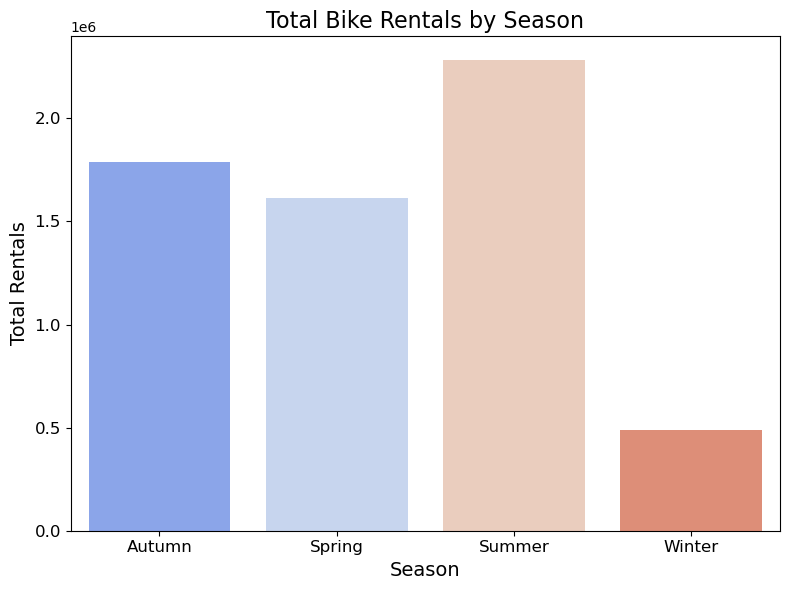

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
seasonal_bike_rentals = df.groupby('Seasons')['Rented Bike Count'].sum()

# Creating a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_bike_rentals.index, y=seasonal_bike_rentals.values, palette='coolwarm')

# Adding titles and labels
plt.title('Total Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.tight_layout()
plt.savefig('bike_rentals_by_season.png', dpi=300)
plt.show()

Top 3 Factors Impacting Bike Rentals:
Temperature(°C)              0.538558
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Name: Rented Bike Count, dtype: float64


C:\Users\Merin\AppData\Local\Temp\ipykernel_18356\3586421863.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.values, y=top_factors.index, palette='viridis')


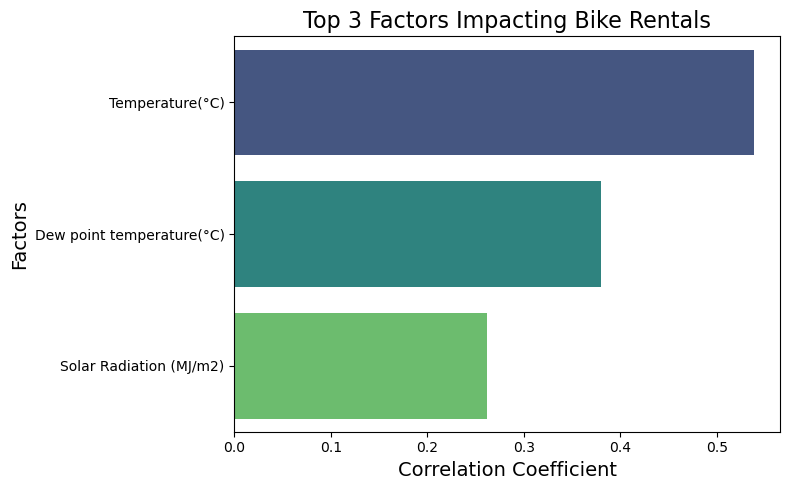

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                     'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 
                     'Rainfall(mm)', 'Snowfall (cm)']

# Calculate correlations
correlation_matrix = df[numerical_columns].corr()

# Extract correlations with 'Rented Bike Count'
rented_bike_corr = correlation_matrix['Rented Bike Count'].sort_values(ascending=False)

# Display top 3 factors (excluding 'Rented Bike Count' itself)
top_factors = rented_bike_corr[1:4]  # Exclude the first row (self-correlation)

print("Top 3 Factors Impacting Bike Rentals:")
print(top_factors)

# Optional: Visualize correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=top_factors.values, y=top_factors.index, palette='viridis')
plt.title("Top 3 Factors Impacting Bike Rentals", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Factors", fontsize=14)
plt.tight_layout()
plt.savefig('Top 3 Factors Impacting Bike Rentals.png', dpi=300)
plt.show()
